Q3.(which is HW4)

In [358]:
#(a)
import pandas as pd
import os
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
data_file="AReM"
dir_read=["bending1","bending2","cycling","lying","sitting","standing","walking"]

In [360]:
#(b)
train =[]
test =[]
for act in dir_read:
    folder=os.path.join(data_file,act)
    for f in os.listdir(folder):
        if f.endswith(".csv"):
            file_path=os.path.join(folder,f)
            index=int(re.findall(r"\d+",f)[0])
            if act in["bending1","bending2"]:
                if index in[1,2]:
                    test.append((file_path,act))
                else:train.append((file_path,act))
            else:
                if index in[1,2,3]:
                    test.append((file_path,act))
                else:train.append((file_path,act))
def read_data(all_file):
    data=[];
    for p,act in all_file:
        df=pd.read_csv(p,skiprows=4)
        df["act"]=act
        data.append(df)
    return pd.concat(data)
train_data =read_data(train)
test_data=read_data(test)
test_data.head()

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,act
0,0,39.25,0.43,22.75,0.43,33.75,1.3,bending1
1,250,39.25,0.43,23.00,0.00,33.00,0.0,bending1
2,500,39.25,0.43,23.25,0.43,33.00,0.0,bending1
3,750,39.50,0.50,23.00,0.71,33.00,0.0,bending1
4,1000,39.50,0.50,24.00,0.00,33.00,0.0,bending1


In [362]:
#(c)
print("minimum, maximum, mean, median, standard deviation, first quartile,third quartile,range are usually used in series classification.")

minimum, maximum, mean, median, standard deviation, first quartile,third quartile,range are usually used in series classification.


In [364]:
features=[]
files=train+test
for i in range(len(files)):
    p=files[i][0]
    act=files[i][1]
    data= pd.read_csv(p,skiprows=4)
    r={}
    r["act"] =act
    for c in ['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']:
        r["min_"+c] = data[c].min()
        r["max_"+c] = data[c].max()
        r["mean_"+c] = data[c].mean()
        r["median_"+c] = data[c].median()
        r["std_"+c] = data[c].std()
        r["1stquart_"+c] = data[c].quantile(0.25)
        r["3rd_"+c] = data[c].quantile(0.75)
    features.append(r)
features_with_act=pd.DataFrame(features)
print(features_with_act)

         act  min_avg_rss12  max_avg_rss12  mean_avg_rss12  median_avg_rss12  \
0   bending1          36.25          48.00       43.969125            44.500   
1   bending1          37.00          48.00       43.454958            43.250   
2   bending1          33.00          47.75       42.179812            43.500   
3   bending1          33.00          45.75       41.678063            41.750   
4   bending1          35.00          47.40       43.954500            44.330   
..       ...            ...            ...             ...               ...   
83  standing          35.50          46.25       43.174938            43.670   
84  standing          32.75          47.00       42.760562            44.500   
85   walking          19.33          43.50       34.227771            35.500   
86   walking          12.50          45.00       33.509729            34.125   
87   walking          15.00          46.75       34.660583            35.000   

    std_avg_rss12  1stquart_avg_rss12  

In [366]:
columns = [col for col in features_with_act.columns if col not in ["act", "label"]]
bootstrap=[]
for c in columns:
    d = features_with_act[c].dropna().values 
    std=np.std(d,ddof=1)
    stds=[]
    for i in range(1000):
        s=np.random.choice(d,size=len(d),replace=True)
        stds.append(np.std(s,ddof=1))
        lower=np.percentile(stds,5)
        upper=np.percentile(stds,95)
    bootstrap.append([c, std,lower,upper])
confi_inter=pd.DataFrame(bootstrap, columns=["feature","std","c_interval_lower","c_interval_upper"])
print(confi_inter)

               feature       std  c_interval_lower  c_interval_upper
0        min_avg_rss12  9.624011          8.293700         10.919635
1        max_avg_rss12  4.207745          3.152205          5.156076
2       mean_avg_rss12  5.276431          4.644125          5.842526
3     median_avg_rss12  5.386624          4.724238          5.951577
4        std_avg_rss12  1.771282          1.562934          1.942506
5   1stquart_avg_rss12  6.127846          5.559177          6.582335
6        3rd_avg_rss12  5.031028          4.215748          5.775705
7        min_var_rss12  0.000000          0.000000          0.000000
8        max_var_rss12  5.059656          4.619637          5.417616
9       mean_var_rss12  1.577908          1.403077          1.714940
10    median_var_rss12  1.413545          1.240348          1.541252
11       std_var_rss12  0.885875          0.810693          0.945331
12  1stquart_var_rss12  0.948434          0.838778          1.032237
13       3rd_var_rss12  2.131337  

In [367]:
print("I select mean 3rd and max as three most important fime_domain features. ")
print("They have high standard deviation,which means they have strong discriminative power.")
print("They have wide confidence intervals,means that these features vary significantly between activities.")


I select mean 3rd and max as three most important fime_domain features. 
They have high standard deviation,which means they have strong discriminative power.
They have wide confidence intervals,means that these features vary significantly between activities.


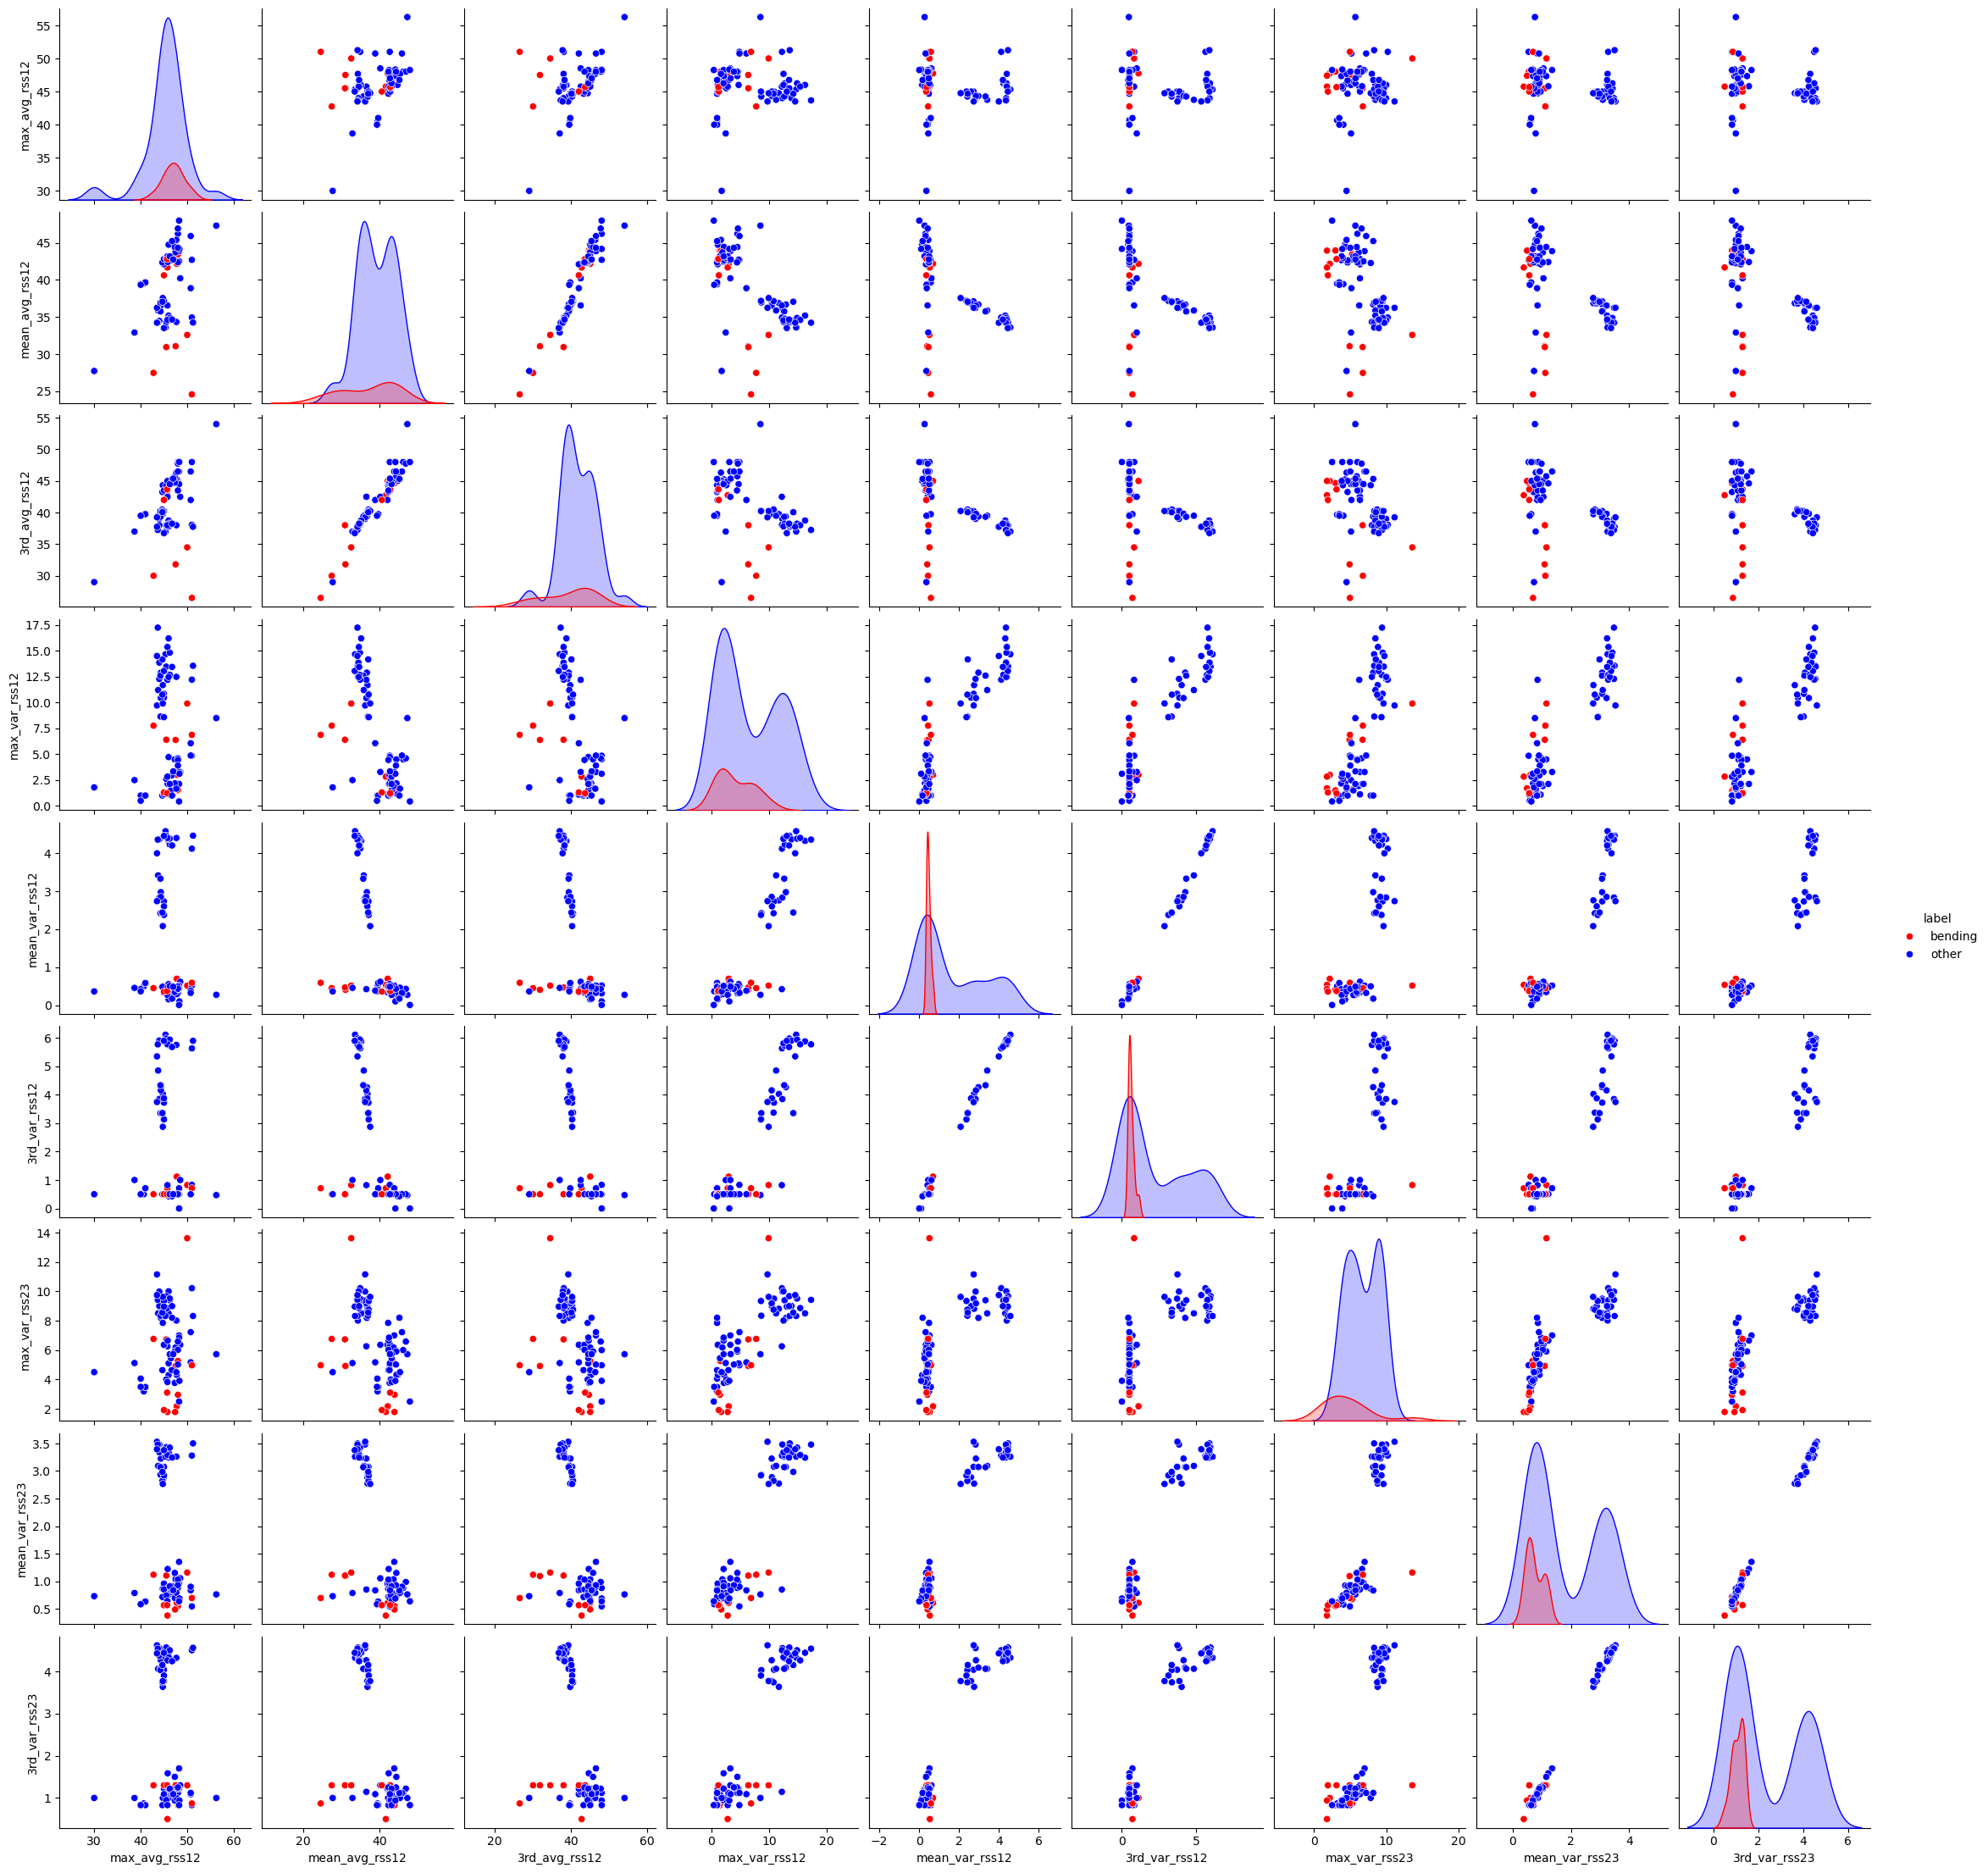

In [368]:
features_with_act['label'] =np.where(features_with_act['act'].str.contains('bending'),
    'bending',
    'other')
def pairplot(features, df):
    plot= df[features+['label']]
    sns.pairplot(plot,hue='label', palette={'bending':'red','other':'blue'})
    plt.show()
features_plot=[
    'max_avg_rss12','mean_avg_rss12','3rd_avg_rss12',
    'max_var_rss12','mean_var_rss12','3rd_var_rss12',
    'max_var_rss23','mean_var_rss23','3rd_var_rss23']
pairplot(features_plot,features_with_act)

Below are HW5

Q4.(a)i

In [573]:
import pandas as pd
import numpy as np
import os
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import statsmodels.api as sm
features = []
for i in range(len(train)):
    p = files[i][0]
    act = files[i][1]
    data = pd.read_csv(p,skiprows=4)
    seg_len = len(data)//2 

    r = {"act":act}
    for j in range(2):
        start=j* seg_len
        end=(j+ 1) * seg_len
        seg= data.iloc[start:end]

        for c in ['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']:
            s= f"_{c}_{j+1}"
            r["min"+ s]= seg[c].min()
            r["max"+ s]= seg[c].max()
            r["mean"+ s]= seg[c].mean()
            r["median"+s]= seg[c].median()
            r["std"+ s]= seg[c].std()
            r["1stquart"+s]= seg[c].quantile(0.25)
            r["3rd"+ s]= seg[c].quantile(0.75)
    features.append(r)
features_with_act_half = pd.DataFrame(features)
features_with_act_half["label"]= np.where(features_with_act_half["act"].str.contains("bending"), 1, 0)
features_with_act_half

,act,min_avg_rss12_1,max_avg_rss12_1,mean_avg_rss12_1,median_avg_rss12_1,std_avg_rss12_1,1stquart_avg_rss12_1,3rd_avg_rss12_1,min_var_rss12_1,max_var_rss12_1,...,1stquart_avg_rss23_2,3rd_avg_rss23_2,min_var_rss23_2,max_var_rss23_2,mean_var_rss23_2,median_var_rss23_2,std_var_rss23_2,1stquart_var_rss23_2,3rd_var_rss23_2,label
0,bending1,36.67,45.00,43.486208,43.710,1.281976,42.3300,44.5000,0.0,1.30,...,21.0000,23.5000,0.00,2.96,0.585750,0.500,0.487918,0.4225,0.8300,1
1,bending1,39.00,48.00,44.117042,45.000,1.359836,43.5000,45.0000,0.0,1.30,...,22.5000,23.7500,0.00,4.06,0.543875,0.500,0.473445,0.4300,0.7100,1
2,bending1,33.75,47.75,43.278875,45.000,3.473355,42.0000,45.2500,0.0,3.00,...,28.7500,33.7500,0.00,2.18,0.586083,0.470,0.491873,0.0000,0.8700,1
3,bending1,33.00,45.75,41.621208,42.330,3.118644,39.6525,44.2500,0.0,2.83,...,28.3100,30.5625,0.00,1.50,0.347500,0.430,0.363144,0.0000,0.5000,1
4,bending1,36.50,46.50,44.057167,44.500,1.556971,43.2500,45.0000,0.0,1.50,...,33.0000,36.2500,0.00,1.50,0.388333,0.000,0.478528,0.0000,0.7100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,walking,20.33,44.50,34.036750,34.415,4.872880,30.7500,37.7500,0.0,13.47,...,13.5000,17.7500,0.00,9.67,3.321417,3.155,1.758379,2.0500,4.3950,0
65,walking,19.25,44.00,34.916792,35.375,4.634209,31.7500,38.2500,0.0,13.86,...,13.7300,17.5000,0.43,8.26,3.241000,3.060,1.657578,2.1200,4.3050,0
66,walking,24.33,44.00,34.920792,35.330,4.272282,32.2500,37.8125,0.0,14.82,...,14.0000,18.0625,0.00,9.51,3.418667,3.350,1.598536,2.1700,4.4525,0
67,walking,18.33,44.00,34.836458,35.750,4.869092,32.0000,38.6900,0.0,12.38,...,13.9375,18.2500,0.47,8.84,3.409458,3.110,1.707089,2.1700,4.3450,0


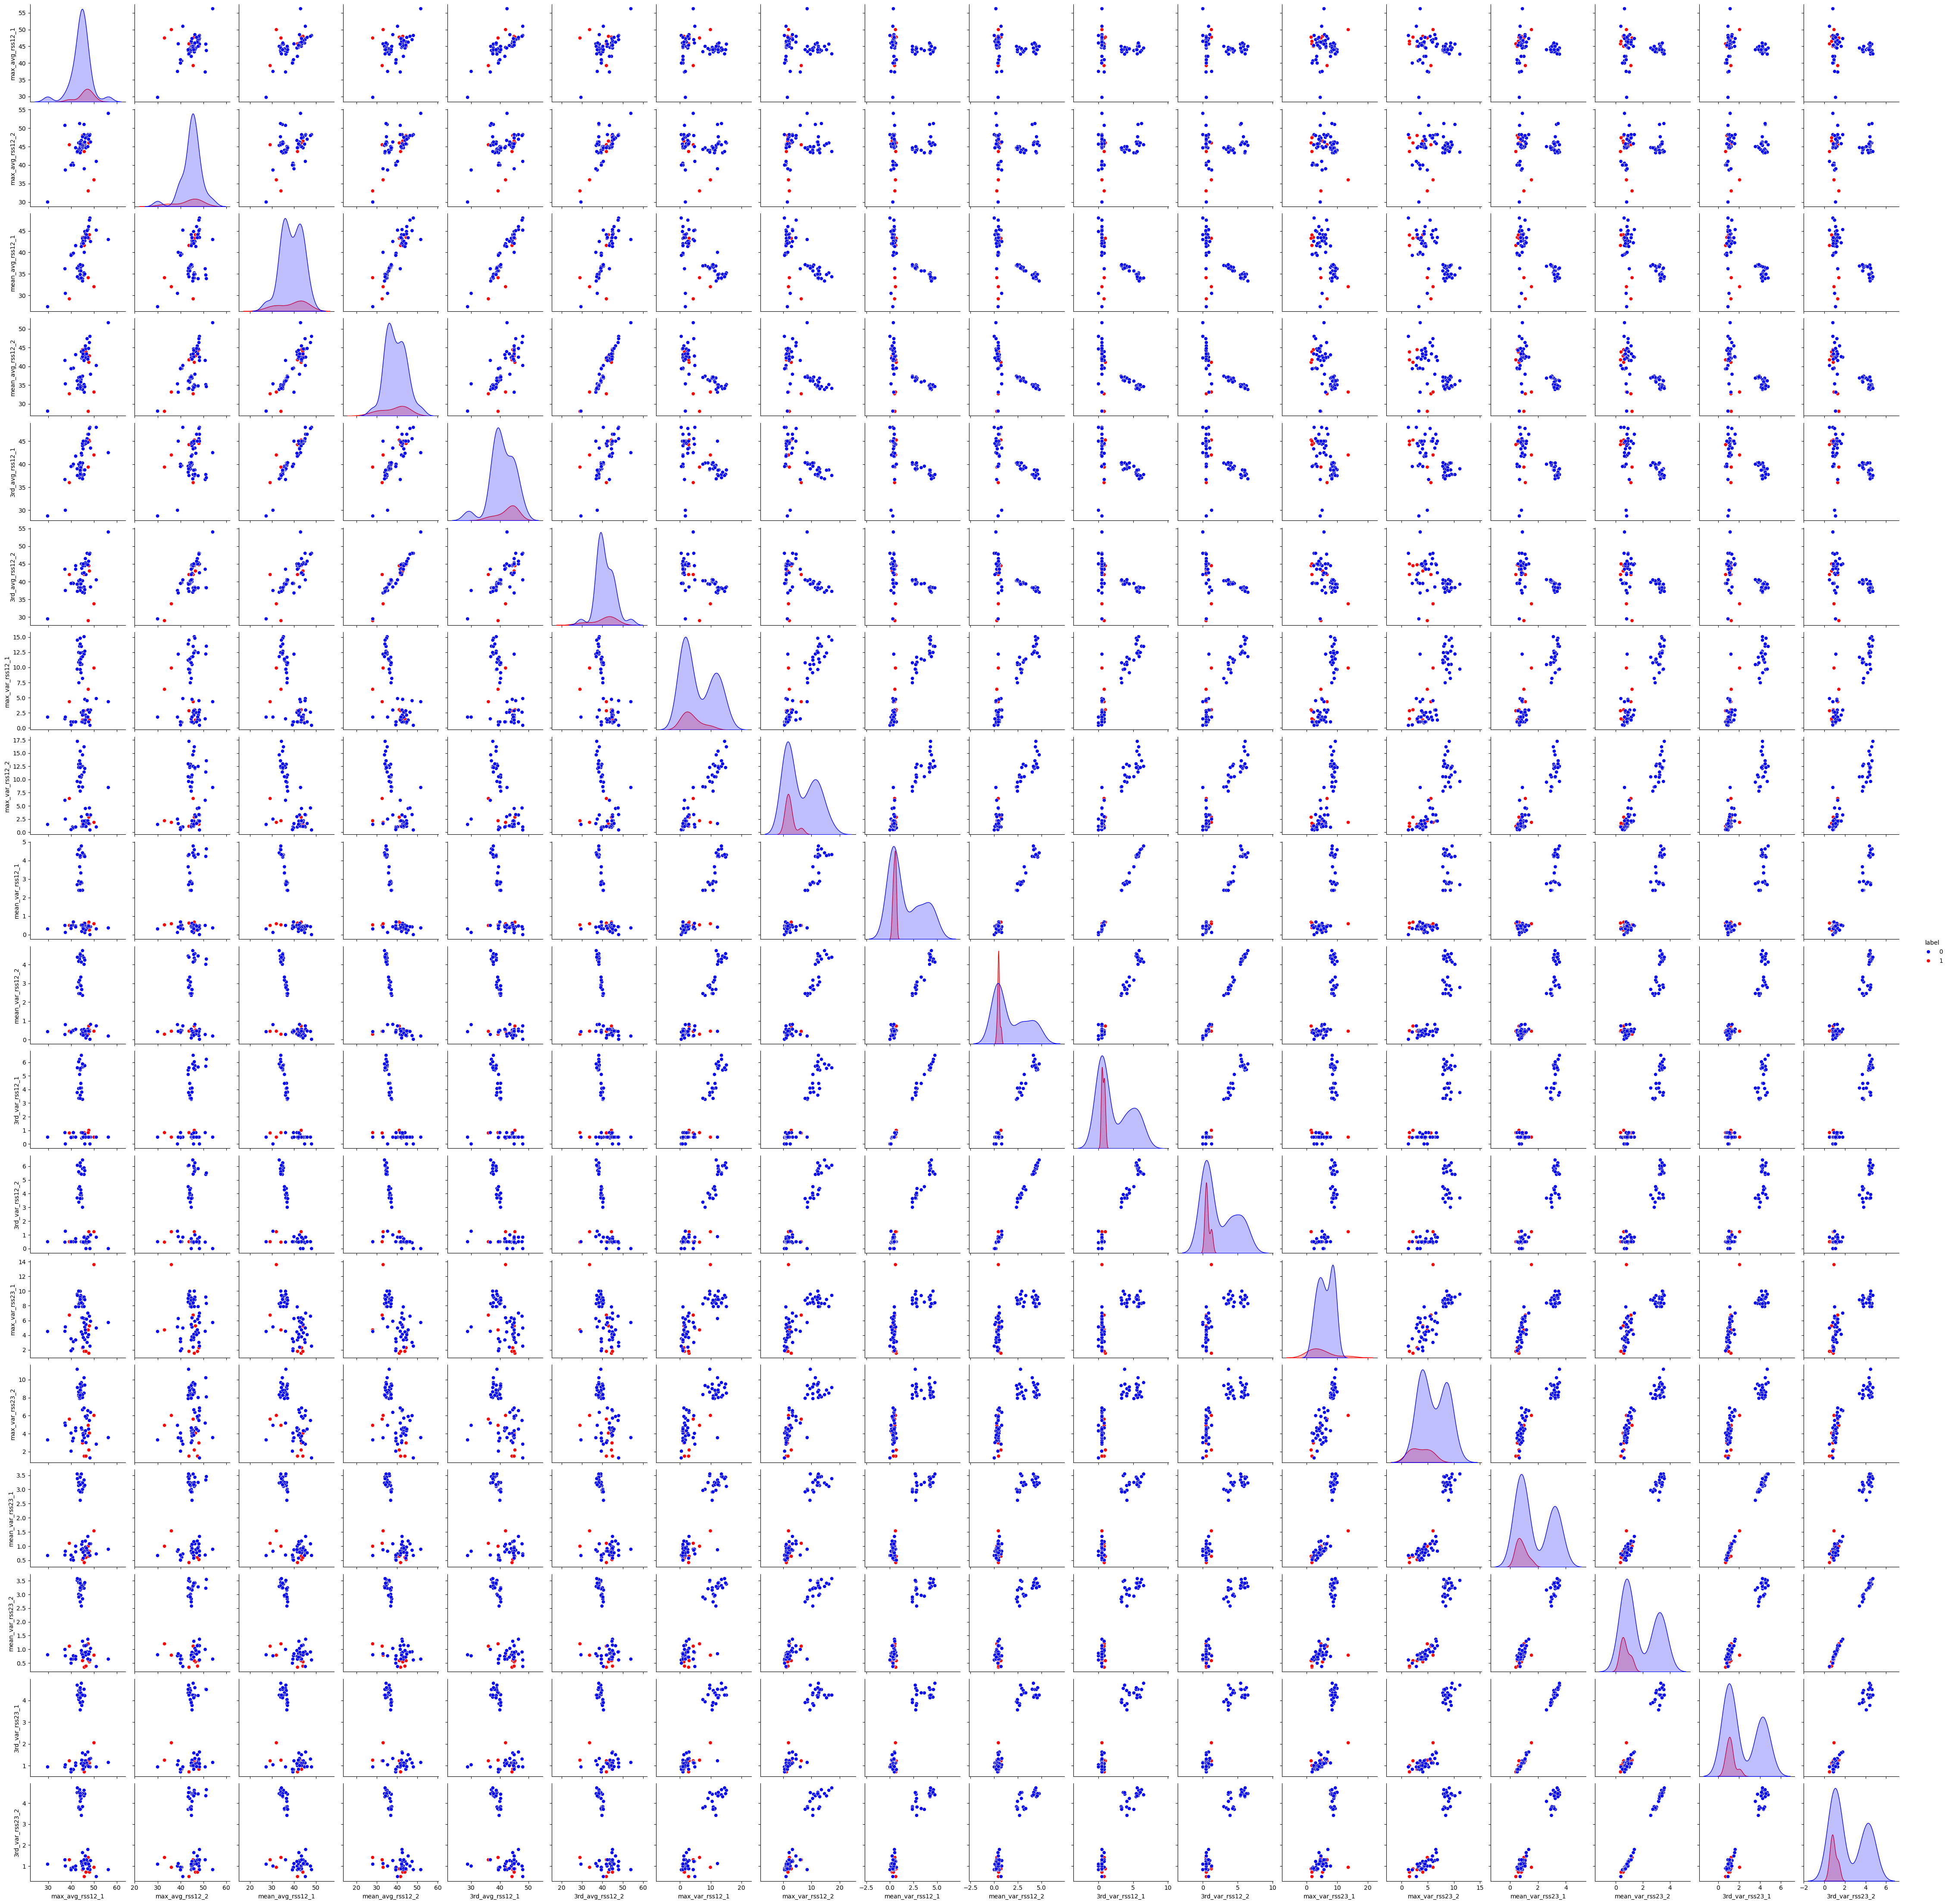

In [496]:
features_plot=[
    f"{st}_{t}_{seg}"
    for t in ["avg_rss12","var_rss12","var_rss23"]
    for st in ["max","mean","3rd"]
    for seg in [1,2]
]
sns.pairplot(features_with_act_half[features_plot + ["label"]],hue="label",palette={1:'red', 0:'blue'})
plt.show()

(a)ii

In [523]:
def get_all_l_features(train,l_range=range(1, 21)):
    all_features_by_l={}
    for l in l_range:
        features= []
        for p, act in train:
            df= pd.read_csv(p, skiprows=4)
            seg_len= len(df)// l
            for j in range(l):
                start =j * seg_len
                end = (j+ 1) * seg_len
                seg= df.iloc[start:end]
                if seg.shape[0] < 2:
                    continue
                r = {"act": act}
                for c in ['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']:
                    s= f"_{c}_{j+1}"
                    r["min"+ s]= seg[c].min()
                    r["max"+ s]= seg[c].max()
                    r["mean"+ s]= seg[c].mean()
                    r["median"+s]= seg[c].median()
                    r["std"+ s]= seg[c].std()
                    r["1stquart"+s]= seg[c].quantile(0.25)
                    r["3rd"+ s]= seg[c].quantile(0.75)
                features.append(r)
        df_features= pd.DataFrame(features)
        df_features["label"] = np.where(df_features["act"].str.contains("bending"), 1, 0)
        df_features= df_features.drop(columns=["act"])
        all_features_by_l[l] = df_features
    return all_features_by_l
all_features_by_l= get_all_l_features(train)
results =[]
for l in range(1, 21):
    df = all_features_by_l[l]
    X = df.drop(columns=["label"])
    y = df["label"]
    X = SimpleImputer(strategy='median').fit_transform(X)
    X = StandardScaler().fit_transform(X)

    lr= LogisticRegression(max_iter=400)
    rfecv = RFECV(estimator=lr, cv=StratifiedKFold(5,shuffle=True,random_state=42), scoring='accuracy')
    rfecv.fit(X, y)
    results.append({
        "l":l,
        "p":rfecv.n_features_,
        "accur": np.max(rfecv.cv_results_['mean_test_score'])
    })
for r in results:
    print(f"({r['l']}, {r['p']})")
    print(f"Scores {r['accur']}")

(1, 3)
Scores 0.9857142857142858
(2, 37)
Scores 0.9346560846560846
(3, 5)
Scores 0.9325203252032519
(4, 11)
Scores 0.9383766233766234
(5, 15)
Scores 0.927536231884058
(6, 88)
Scores 0.9468997942991478
(7, 67)
Scores 0.913122852233677
(8, 118)
Scores 0.9166420966420967
(9, 116)
Scores 0.919483870967742
(10, 54)
Scores 0.9173913043478261
(11, 43)
Scores 0.9156674799581737
(12, 23)
Scores 0.9166703176341731
(13, 65)
Scores 0.898504034761018
(14, 127)
Scores 0.9099567330804978
(15, 49)
Scores 0.9130434782608695
(16, 65)
Scores 0.906705059646236
(17, 54)
Scores 0.9104964539007092
(18, 116)
Scores 0.897739344474673
(19, 81)
Scores 0.906951499143761
(20, 60)
Scores 0.8978260869565219


iii.

In [531]:
df= all_features_by_l[1]
X= df.drop(columns=["label"])
y= df["label"]
X_filled= SimpleImputer(strategy='median').fit_transform(X)
X_scaled= StandardScaler().fit_transform(X_filled)
rfecv= RFECV(LogisticRegression(max_iter=400), cv=StratifiedKFold(5, shuffle=True, random_state=42), scoring='accuracy')
rfecv.fit(X_scaled, y)
feature_names= X.columns
selected_features= feature_names[rfecv.support_].tolist()
print(selected_features)

['max_avg_rss23_1', 'mean_avg_rss23_1', '1stquart_var_rss23_1']


Optimization terminated successfully.
         Current function value: 0.084498
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                   69
Model:                          Logit   Df Residuals:                       65
Method:                           MLE   Df Model:                            3
Date:                Fri, 18 Apr 2025   Pseudo R-squ.:                  0.7818
Time:                        23:32:12   Log-Likelihood:                -5.8304
converged:                       True   LL-Null:                       -26.718
Covariance Type:            nonrobust   LLR p-value:                 4.479e-09
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.8274      2.783     -1.735      0.083     -10.282       0.627
x1             2.0827      1

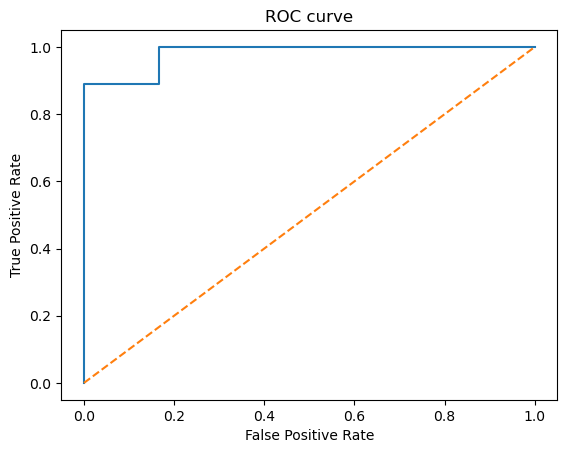

Confusion Matrix:
[[60  0]
 [ 1  8]]


In [594]:
X = df[selected_features]
y0 = df['label']
X= SimpleImputer(strategy='median').fit_transform(X)
X = StandardScaler().fit_transform(X)
X_sm= sm.add_constant(X)
logit_model = sm.Logit(y,X_sm)
print(logit_model.fit().summary())

lr= LogisticRegression()
lr.fit(X, y0)
y_pred =lr.predict(X)
y_proba =lr.predict_proba(X)[:,1]

fpr,tpr, _ = roc_curve(y0, y_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr)
plt.plot([0, 1],[0, 1], "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.show()
print("Confusion Matrix:")
print(confusion_matrix(y0, y_pred))

v.

In [580]:
print("Yes,they are.There is a very high accuracy on the training set ([[60, 0], [1, 8]]).")

Yes,they are.There is a very high accuracy on the training set ([[60, 0], [1, 8]]).


In [ ]:
(b)ii.

In [586]:
print("L1 penalized logistic regression is better , because it is less prone to overfitting due to multicollinearity.L1-regularization is easy to implement.")

L1 penalized logistic regression is better , because it is less prone to overfitting due to multicollinearity.L1-regularization is easy to implement.
